In [1]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import pandas as pd 
import tensorflow as tf
import numpy as np

Using TensorFlow backend.


In [38]:
df = pd.read_csv('https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/international-airline-passengers.csv',\
                 index_col='Month', sep=";")
print(df.head())

         Passengers
Month              
1949-01         112
1949-02         118
1949-03         132
1949-04         129
1949-05         121


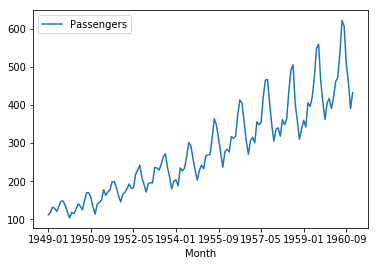

In [39]:
df.plot()

In [40]:
columns_to_keep = ['Passengers']
df = df[columns_to_keep]
df['Passengers'] = df['Passengers'].apply(lambda x: x*1000)
df.index.names = ['Month']
df.sort_index(inplace=True)
print('Total rows: {}'.format(len(df)))
df.head()

Total rows: 144


,Passengers
Month,
1949-01,112000
1949-02,118000
1949-03,132000
1949-04,129000
1949-05,121000


In [42]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [43]:
df.dropna(inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff45bb4fac8>]], dtype=object)

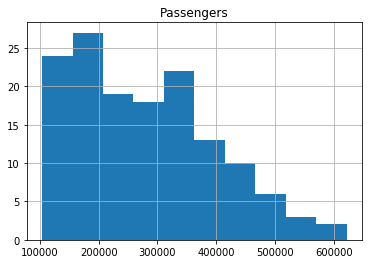

In [44]:
df.hist(bins=10)

In [45]:
dataset = df.astype('float32')

In [46]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset)

In [47]:
train_size = int(len(scaled) * 0.70)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))


train: 100
test: 44


In [48]:
def create_dataset(dataset, look_back=1):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        print(i)
        print('X {} to {}'.format(i, i+look_back))
        print(a)
        print('Y {}'.format(i + look_back))
        print(dataset[i + look_back, 0])
        dataset[i + look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


In [49]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

100 1
0
X 0 to 1
[ 0.01544402]
Y 1
0.027027027027
1
X 1 to 2
[ 0.02702703]
Y 2
0.0540540540541
2
X 2 to 3
[ 0.05405405]
Y 3
0.0482625482625
3
X 3 to 4
[ 0.04826255]
Y 4
0.0328185328185
4
X 4 to 5
[ 0.03281853]
Y 5
0.0598455598456
5
X 5 to 6
[ 0.05984556]
Y 6
0.0849420849421
6
X 6 to 7
[ 0.08494208]
Y 7
0.0849420849421
7
X 7 to 8
[ 0.08494208]
Y 8
0.0617760617761
8
X 8 to 9
[ 0.06177606]
Y 9
0.0289575289575
9
X 9 to 10
[ 0.02895753]
Y 10
0.0
10
X 10 to 11
[ 0.]
Y 11
0.027027027027
11
X 11 to 12
[ 0.02702703]
Y 12
0.0212355212355
12
X 12 to 13
[ 0.02123552]
Y 13
0.042471042471
13
X 13 to 14
[ 0.04247104]
Y 14
0.0714285714286
14
X 14 to 15
[ 0.07142857]
Y 15
0.0598455598456
15
X 15 to 16
[ 0.05984556]
Y 16
0.0405405405405
16
X 16 to 17
[ 0.04054054]
Y 17
0.0868725868726
17
X 17 to 18
[ 0.08687259]
Y 18
0.127413127413
18
X 18 to 19
[ 0.12741313]
Y 19
0.127413127413
19
X 19 to 20
[ 0.12741313]
Y 20
0.104247104247
20
X 20 to 21
[ 0.1042471]
Y 21
0.0559845559846
21
X 21 to 22
[ 0.05598456]
Y 

In [50]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)


(98, 1, 1)
(42, 1, 1)


In [ ]:
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/100
 - 1s - loss: 0.0454
Epoch 2/100
 - 0s - loss: 0.0193
Epoch 3/100
 - 0s - loss: 0.0178
Epoch 4/100
 - 0s - loss: 0.0176
Epoch 5/100
 - 0s - loss: 0.0166
Epoch 6/100
 - 0s - loss: 0.0163
Epoch 7/100
 - 0s - loss: 0.0153
Epoch 8/100
 - 0s - loss: 0.0167
Epoch 9/100
 - 0s - loss: 0.0171
Epoch 10/100
 - 0s - loss: 0.0198
Epoch 11/100
 - 0s - loss: 0.0161
Epoch 12/100
 - 0s - loss: 0.0155
Epoch 13/100
 - 0s - loss: 0.0137
Epoch 14/100
 - 0s - loss: 0.0161
Epoch 15/100
 - 0s - loss: 0.0143
Epoch 16/100
 - 0s - loss: 0.0163
Epoch 17/100
 - 0s - loss: 0.0146
Epoch 18/100
 - 0s - loss: 0.0128
Epoch 19/100
 - 0s - loss: 0.0133
Epoch 20/100
 - 0s - loss: 0.0130
Epoch 21/100
 - 0s - loss: 0.0118
Epoch 22/100
 - 0s - loss: 0.0108
Epoch 23/100
 - 0s - loss: 0.0126
Epoch 24/100
 - 0s - loss: 0.0097
Epoch 25/100
 - 0s - loss: 0.0118
Epoch 26/100
 - 0s - loss: 0.0121
Epoch 27/100
 - 0s - loss: 0.0097
Epoch 28/100
 - 0s - loss: 0.0139
Epoch 29/100
 - 0s - loss: 0.0107
Epoch 30/100
 - 0s - lo